# Genetic Algorithm Tessellation
In this notebook, we'll use genetic algorithms to create tessellations!

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("..") # Move execution to root dir

In [2]:
from enum import Enum, auto
from typing import Callable, Iterator, Optional

import numpy as np
from matplotlib import pyplot as plt 
from leap_ec import ops, probe
from leap_ec.algorithm import generational_ea
from leap_ec.representation import Representation

from tessellation.draw import MPLDrawer
from tessellation.procgen.generator import ALL_ACTIONS, Action, Generator, GenerationResult
from tessellation.procgen.ga.genome import TessellationDecoder
from tessellation.procgen.ga import heuristic
from tessellation.procgen.ga import mutate
from tessellation.procgen.ga.problem import TessellationProblem, initialize_genome

## Configuration

In [3]:
# Proc gen constants
SEED = 32
SIDE_LEN = 100

# Genetic Algorithm config
SIDE_LEN = 100
SUBSTITUTION_PROB, INSERTION_PROB, DELETION_PROB = 0.1, 0.1, 0.1
POP_SIZE = 50
MAX_GENERATIONS = 100
ACTION_PROBS = np.ones(len(Action)) / len(Action)
HEURISTIC_FNS = [
    heuristic.count_number_points,
    heuristic.bottom_top_even,
    heuristic.duplicated_points,
    lambda phenome: heuristic.out_of_bounds(phenome, SIDE_LEN),
]
FN_WEIGHTS = np.array([1, 0.2, 1, 1])

# Draw config
CMAP = "gray"
drawer = MPLDrawer(CMAP)    

## Genetic Algorithm Tessellation
We'll be using the LEAP package for our genetic algorithms.

In [4]:
from leap_ec.simple import ea_solve

def f(x):
    """A real-valued function to optimized."""
    return sum(x)**2

ea_solve(f, bounds=[(-5.12, 5.12) for _ in range(5)], maximize=True)

step,bsf
0,65.53540554367002
1,150.71120673564468
2,188.16334987786922
3,243.61780687819208
4,243.61780687819208
5,271.138057538947
6,449.74204814479396
7,449.74204814479396
8,491.8889703029902
9,519.0408541377953
10,532.9362846061464
11,532.9362846061464
12,532.9362846061464
13,546.15889537095
14,546.15889537095
15,587.3568215271507
16,587.3568215271507
17,655.3600000000001
18,655.3600000000001
19,655.3600000000001
20,655.3600000000001
21,655.3600000000001
22,655.3600000000001
23,655.3600000000001
24,655.3600000000001
25,655.3600000000001
26,655.3600000000001
27,655.3600000000001
28,655.3600000000001
29,655.3600000000001
30,655.3600000000001
31,655.3600000000001
32,655.3600000000001
33,655.3600000000001
34,655.3600000000001
35,655.3600000000001
36,655.3600000000001
37,655.3600000000001
38,655.3600000000001
39,655.3600000000001
40,655.3600000000001
41,655.3600000000001
42,655.3600000000001
43,655.3600000000001
44,655.3600000000001
45,655.3600000000001
46,655.3600000000001
47,655.360000

array([-5.12, -5.12, -5.12, -5.12, -5.12])

### Define Problem and Representation

In [5]:
problem = TessellationProblem(
    heuristic_fns=HEURISTIC_FNS, 
    fn_weights=FN_WEIGHTS, 
    side_len=SIDE_LEN
)

representation = Representation(
    decoder=TessellationDecoder(),
    initialize=lambda: initialize_genome(problem) 
)

### Evolve!

In [6]:
final_pop = generational_ea(
    max_generations=MAX_GENERATIONS, 
    pop_size=POP_SIZE,
    problem=problem,
    representation=representation,

    # The operator pipeline
    pipeline=[
        # Select parents via tournament_selection selection
        ops.tournament_selection,
        
        ops.clone,  # Copy them (just to be safe)
        lambda individual_iterator: mutate.apply_mutation(
            mutate.substitute_action, individual_iterator, fn_kwargs={"action_probs": ACTION_PROBS}
        ),
        lambda individual_iterator: mutate.apply_mutation(
            mutate.insert_action, individual_iterator, fn_kwargs={"action_probs": ACTION_PROBS}
        ),
        lambda individual_iterator: mutate.apply_mutation(mutate.delete_action, individual_iterator),
        
        # Crossover with a 40% chance of swapping each gene
        # ops.UniformCrossover(p_swap=0.4),
        
        ops.evaluate,  # Evaluate fitness
        
        # Collect offspring into a new population
        ops.pool(size=POP_SIZE),
        
        probe.BestSoFarProbe()  # Print the BSF
    ]
)

step,bsf
0,101.6
1,101.6
2,104.8
3,104.8
4,104.8
5,106.0
6,109.0
7,111.8
8,111.8
9,113.6
10,113.6
11,124.8
12,124.8
13,128.4
14,128.4
15,128.4
16,128.4
17,132.2
18,140.4
19,140.4
20,140.4
21,140.4
22,141.8
23,141.8
24,142.8
25,147.2
26,147.2
27,147.2
28,151.8
29,151.8
30,153.8
31,157.4
32,157.4
33,157.4
34,159.6
35,159.6
36,159.6
37,161.4
38,161.4
39,161.4
40,161.4
41,161.4
42,161.4
43,161.4
44,161.4
45,162.6
46,162.6
47,162.6
48,162.6
49,162.6
50,162.6
51,162.6
52,162.6
53,162.6
54,162.6
55,162.6
56,162.6
57,162.6
58,162.6
59,162.6
60,162.6
61,162.6
62,162.6
63,162.6
64,162.6
65,162.6
66,162.6
67,162.6
68,162.6
69,162.6
70,162.6
71,162.6
72,162.6
73,162.6
74,164.2
75,164.2
76,164.2
77,164.2
78,164.2
79,164.2
80,164.2
81,164.2
82,164.2
83,164.2
84,164.2
85,164.2
86,164.2
87,164.2
88,164.2
89,164.2
90,164.2
91,164.2
92,164.2
93,164.2
94,164.2
95,164.2
96,164.2
97,164.2
98,164.2
99,164.2


## Evaluate

Individual: 19; Fitness: 131.0


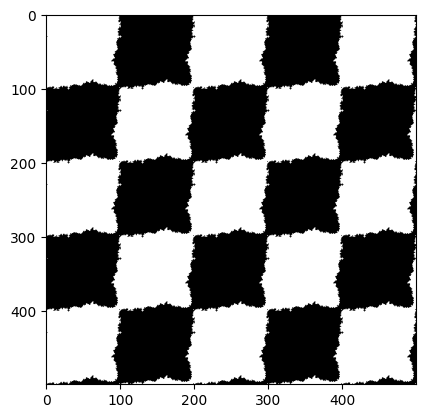

Press 'q' to quit, anything else to continue...



KeyboardInterrupt



In [7]:
from IPython.display import clear_output

decoder = TessellationDecoder()
show = True
for idx, individual in enumerate(final_pop):
    genome = individual.genome
    phenome = decoder.decode(genome)
    print(f"Individual: {idx}; Fitness: {problem.evaluate(phenome)}")
    
    mask = np.zeros((SIDE_LEN, SIDE_LEN), dtype=int)
    mask = Generator._draw_line(mask, genome.start_point, genome.actions)
    mask_T = Generator._draw_line(mask.T, genome.start_point, genome.actions)
    final_mask = mask | mask_T
    
    result = GenerationResult(final_mask, [genome.actions, genome.actions])
    tessellation = Generator.tessellate(result)
    
    drawer.draw(tessellation)
    if show:
        plt.show()
        print("Press 'q' to quit, anything else to continue...")
        user_action = input()
        
    
        if user_action.lower() == "q":
            break
        clear_output()
    